![Growdev](https://www.growdev.com.br/assets/images/logo_growdev.png)

![Formação Engenharia de Dados](https://d335luupugsy2.cloudfront.net/cms/files/524558/1707226566/$occu5m8t1op)

Este material tem como objetivo incentivar a prática dos conteúdos estudados até o momento, e a pesquisa. Tenha em consideração que o exercício foi pensado para incentivar a prática dos conteúdos estudados até então, porém aprender a pesquisar faz parte do processo de aprendizagem.

Fique tranquilo, faça os exercícios com calma, e boa prática!


#Orientações:

 - Faça uma copia deste arquivo
 - Após concluir os exercicios, suba seu exercicio para o GitHub e compartilhe o link no **google** Classroom


#Exercícios pandas e plot

As questões a seguir utilizam como base o dataset de venda de jogos eletrônicos disponível no seguinte [link.](https://www.kaggle.com/code/rafa84miranda/vendas-de-jogos-de-videogames/data?select=vgsales.csv)

Os campos são:
- Rank: posição no ranking de vendas
- Name: nome do jogo
- Platform: plataforma/console
- Year: ano de lançamento
- Genre: gênero
- Publisher: empresa que publicou o jogo
- NA_Sales: vendas na américa do norte (em milhões de dólares)
- EU_Sales: vendas na europa (em milhões de dólares)
- JP_Sales: vendas no japão (em milhões de dólares)
- Other_Sales: outras vendas (em milhões de dólares)
- Global_Sales: vendas globais (em milhões de dólares)


In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_games = pd.read_csv('/Users/ramon/Documents/01.ESTUDOS/01.6.DEV/04.GROWDEV/03-3ª Edição - Engenharia de dados/00- Growdev - Eng. Dados/Atividades/Módulo 03/dados/vgsales.csv')

In [6]:
# Primeiro overview do DF:
df_games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.0,0.01,0.77


In [7]:
# Verificar se tenho valores nulos:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16324 entries, 0 to 16323
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16324 non-null  int64  
 1   Name          16324 non-null  object 
 2   Platform      16324 non-null  object 
 3   Year          16324 non-null  int64  
 4   Genre         16324 non-null  object 
 5   Publisher     16288 non-null  object 
 6   NA_Sales      16324 non-null  float64
 7   EU_Sales      16324 non-null  float64
 8   JP_Sales      16324 non-null  float64
 9   Other_Sales   16324 non-null  float64
 10  Global_Sales  16324 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


In [8]:
# Verificar o formato dos dados de cada coluna:
df_games.dtypes

Rank              int64
Name             object
Platform         object
Year              int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [9]:
# Verificar algumas métricas:
df_games.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16324.000000,16324.000000,16324.000000,16324.000000,16324.000000,16324.000000,16324.000000
mean,8291.508270,2006.404251,0.265464,0.147581,0.078673,0.048334,0.540328
std,4792.043734,5.826744,0.821658,0.508809,0.311584,0.189902,1.565860
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4135.750000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8293.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.250000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2016.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [10]:
df_games

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
1,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.00,0.03,2.76
2,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.00,0.01,1.15
3,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.00,0.01,1.05
4,2671,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.00,0.01,0.77
...,...,...,...,...,...,...,...,...,...,...,...
16319,16565,Mighty No. 9,XOne,2016,Platform,Deep Silver,0.01,0.00,0.00,0.00,0.01
16320,16572,Resident Evil 4 HD,XOne,2016,Shooter,Capcom,0.01,0.00,0.00,0.00,0.01
16321,16573,Farming 2017 - The Simulation,PS4,2016,Simulation,UIG Entertainment,0.00,0.01,0.00,0.00,0.01
16322,16579,Rugby Challenge 3,XOne,2016,Sports,Alternative Software,0.00,0.01,0.00,0.00,0.01


Qual foi o jogo mais vendido no mundo em 2010?



In [11]:
# qual o jogo que tem maior global_sales com base no year de 2010
df_games.loc[df_games['Year'] == 2010].sort_values(by='Global_Sales', ascending=False).head(1)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
11183,16,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82


Qual foi a empresa que mais vendeu de 2005 até 2016 - Construa um gráfico de barras para apresentar


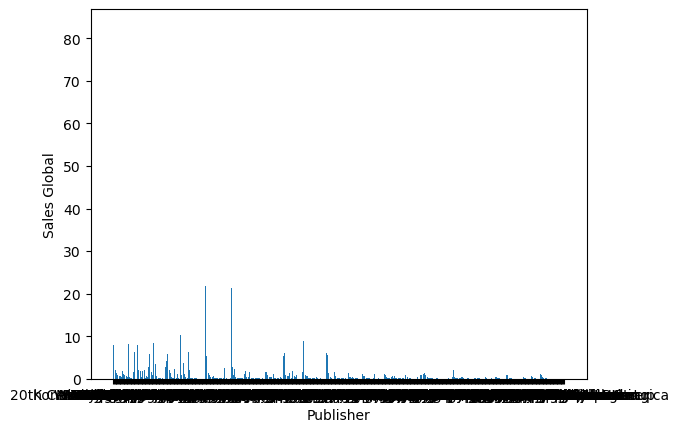

In [12]:
# year = df_games.loc[(df_games['Year'] >= 2005) & (df_games['Year'] <= 2016)]
# year = df_games.loc[(df_games['Year'] >= 2005) & (df_games['Year'] <= 2016)]
publisher = df_games['Publisher'].astype(str) # Convert the 'Publisher' column to string type
sales_global = df_games['Global_Sales']

fig, ax = plt.subplots()

ax.bar(publisher, sales_global)

ax.set_xlabel('Publisher')
ax.set_ylabel('Sales Global')

plt.show()

Qual o nome do jogo que menos foi vendido em 2008 do gênero Sports.


In [13]:
df_menos_vendido_2008 = df_games.loc[(df_games['Year'] == 2008) & (df_games['Genre'] == 'Sports') ].sort_values(by='Global_Sales', ascending=True).head(1)
df_menos_vendido_2008 = df_menos_vendido_2008['Name']
df_menos_vendido_2008

9731    Summer Athletics
Name: Name, dtype: object

Qual o percentual relacionado às vendas globais de jogos de Wii (excluindo-se América do norte, japão e europa) de 2006 até 2010?





In [14]:
df_wii = df_games.loc[(df_games['Platform'] == 'Wii') &
                      (df_games['Year'] >= 2006) &
                      (df_games['Year'] <= 2010)] /
                      .groupby('Year') /
                      [['Other_Sales', 'Global_Sales']].sum()

df_wii['Other_Sales_Percentage'] = ((df_wii['Other_Sales'] / df_wii['Global_Sales']) * 100).round(2)

# Formatar:
df_wii['Other_Sales_Percentage'] = df_wii['Other_Sales_Percentage'].apply(lambda x: f'{x:.2f}%')

print(df_wii)

      Other_Sales  Global_Sales Other_Sales_Percentage
Year                                                  
2006        13.56        137.91                  9.83%
2007        13.75        154.97                  8.87%
2008        15.25        174.16                  8.76%
2009        17.79        210.44                  8.45%
2010        10.47        131.80                  7.94%


Mostre um gráfico de linhas com as vendas em diferentes plataformas ao longo dos anos.


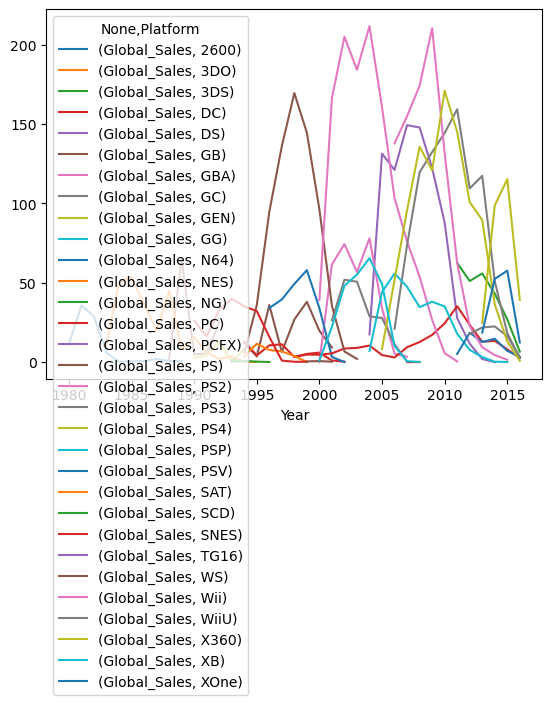

In [15]:
# FAZER:
# Mostre um gráfico de linhas com as vendas em diferentes plataformas ao longo dos anos.
df_games.groupby(['Year', 'Platform'])[['Global_Sales']].sum().unstack().plot()
plt.show()

Mostre um gráfico de pizza com o percentual de vendas dos diferentes gêneros de jogos.




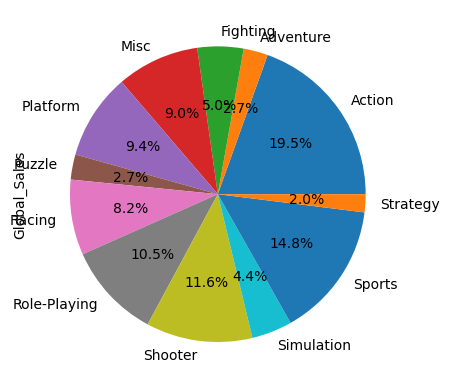

In [17]:
# FAZER:
# Mostre um gráfico de pizza com o percentual de vendas dos diferentes gêneros de jogos.
df_games.groupby('Genre')['Global_Sales'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.show()

#Exercícios_pandas

Utilize os arquivos [livros.csv](https://drive.google.com/file/d/1fzuUyFxhzhE9U4_-i3IIUTwvgr3QG1Hj/view?usp=sharing), [livros_genero.csv](https://drive.google.com/file/d/1Cww5lAb7l_LQXVhH1ieyIOWIrqorNKcn/view?usp=sharing) e [livros_classicos.csv](https://drive.google.com/file/d/1pbSReiGSIIlHHXbFBOAaA5zTlNTrbY9P/view?usp=sharing) como entrada para o processamento requerido nos seguintes exercícios.


In [19]:
df_livros = pd.read_csv('/Users/ramon/Documents/01.ESTUDOS/01.6.DEV/04.GROWDEV/03-3ª Edição - Engenharia de dados/00- Growdev - Eng. Dados/Atividades/Módulo 03/dados/livros.csv')
df_livros_genero = pd.read_csv('C:/Users/ramon/Documents/01.ESTUDOS/01.6.DEV/04.GROWDEV/03-3ª Edição - Engenharia de dados/00- Growdev - Eng. Dados/Atividades/Módulo 03/dados/livros_genero.csv')
df_livros_classicos = pd.read_csv('C:/Users/ramon/Documents/01.ESTUDOS/01.6.DEV/04.GROWDEV/03-3ª Edição - Engenharia de dados/00- Growdev - Eng. Dados/Atividades/Módulo 03/dados/livros_classicos.csv')


In [20]:

df_livros.head()

,nome,paginas
0,livro 1,257
1,livro 2,106
2,livro 3,150
3,livro 4,175
4,livro 5,321


In [21]:
df_livros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nome     10 non-null     object
 1   paginas  10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 292.0+ bytes


In [22]:
df_livros.dtypes
     

nome       object
paginas     int64
dtype: object

In [23]:
df_livros_genero.head()

,genero,autor
0,Drama,Pedro
1,Aventura,José
2,Drama,Carlos
3,Romance,Maria
4,Romance,Fabio


In [24]:
df_livros_genero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   genero  11 non-null     object
 1   autor   11 non-null     object
dtypes: object(2)
memory usage: 308.0+ bytes


In [25]:
df_livros_genero.dtypes

genero    object
autor     object
dtype: object

In [26]:
df_livros_classicos.head()

,nome,autor
0,livro 1,Jorge
1,livro 2,Santos
2,livro 3,Leandro
3,livro 4,Clara
4,livro 5,Flavia


In [27]:
df_livros_classicos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   nome    10 non-null     object
 1   autor   10 non-null     object
dtypes: object(2)
memory usage: 292.0+ bytes


In [28]:
df_livros_classicos.dtypes

nome     object
autor    object
dtype: object

Faça a concatenação das bases de dados livros.csv e livros_genero.csv e encontre qual o gênero de livro correspondente a cada livro.

In [31]:

livros_com_genero = pd.concat([df_livros, df_livros_genero], axis=1)

for index, row in livros_com_genero.iterrows():
    if pd.notnull(row['genero']):
      print(f"Nome do livro: {row['nome']} - Gênero do livro: {row['genero']}")


Nome do livro: livro 1 - Gênero do livro: Drama
Nome do livro: livro 2 - Gênero do livro: Aventura
Nome do livro: livro 3 - Gênero do livro: Drama
Nome do livro: livro 4 - Gênero do livro: Romance
Nome do livro: livro 5 - Gênero do livro: Romance
Nome do livro: livro 6 - Gênero do livro: Aventura
Nome do livro: livro 7 - Gênero do livro: Drama
Nome do livro: livro 8 - Gênero do livro: Aventura
Nome do livro: livro 9 - Gênero do livro: Romance
Nome do livro: livro 10 - Gênero do livro: Aventura
Nome do livro: nan - Gênero do livro: Romance


Faça a concatenação das bases de dados de livros e livros_genero e encontre qual os gêneros e os autores que não possuem um livro correspondente.

In [32]:
for index, row in livros_com_genero.iterrows():
    if pd.isnull(row['nome']):
      print(f"Nome do livro: {row['nome']} - Gênero do livro: {row['genero']}")

Nome do livro: nan - Gênero do livro: Romance


Faça a junção das bases de livros e livros clássicos.

In [33]:

livros_e_classicos = pd.concat([df_livros, df_livros_classicos['autor']], axis=1)
livros_e_classicos

,nome,paginas,autor
0,livro 1,257,Jorge
1,livro 2,106,Santos
2,livro 3,150,Leandro
3,livro 4,175,Clara
4,livro 5,321,Flavia
5,livro 6,159,Leandro
6,livro 7,980,Santos
7,livro 8,235,Marcia
8,livro 9,745,Marcia
9,livro 10,126,Clara


Faça a junção das bases de livros e livros clássicos apenas com os elementos em comum entre ambos e remova os índices dos antigos dataframes.

In [34]:
livros_e_classicos = pd.concat([df_livros, df_livros_classicos['autor']], axis=1)
livros_e_classicos = livros_e_classicos.reset_index(drop=True)
livros_e_classicos

,nome,paginas,autor
0,livro 1,257,Jorge
1,livro 2,106,Santos
2,livro 3,150,Leandro
3,livro 4,175,Clara
4,livro 5,321,Flavia
5,livro 6,159,Leandro
6,livro 7,980,Santos
7,livro 8,235,Marcia
8,livro 9,745,Marcia
9,livro 10,126,Clara


Faça a junção das bases de livros e livros clássicos apenas com os elementos comuns entre ambos, e adicione chaves para o dataframe de livros e de livros clássicos.

In [35]:
comum_livros = pd.merge(df_livros, df_livros_classicos, how='inner', on=['nome'])
comum_livros

,nome,paginas,autor
0,livro 1,257,Jorge
1,livro 2,106,Santos
2,livro 3,150,Leandro
3,livro 4,175,Clara
4,livro 5,321,Flavia
5,livro 6,159,Leandro
6,livro 7,980,Santos
7,livro 8,235,Marcia
8,livro 9,745,Marcia
9,livro 10,126,Clara


Faça a junção das bases de livros e livros clássicos apenas com os elementos comuns entre ambos, e adicione chaves para o dataframe de livros e de livros clássicos, além de nomes para os índices.

In [36]:
# Adicionando chaves para cada dataframe
df_livros['id'] = range(1, len(df_livros) + 1)
df_livros_classicos['id'] = range(1, len(df_livros_classicos) + 1)

# Nomeando os índices
df_livros.index.name = 'indice_livros'
df_livros_classicos.index.name = 'indice_livros_classicos'

# Realizando a junção (inner join) com os elementos comuns entre ambos
comum_livros_mais_indice = pd.merge(df_livros, df_livros_classicos, how='inner', on=['nome'])

# Nomeando o índice do dataframe resultante
comum_livros_mais_indice.index.name = 'indice_comum'

# Mostrando os dataframes resultantes
print("Dataframe de Livros:")
print(df_livros)

print("\nDataframe de Livros Clássicos:")
print(df_livros_classicos)

print("\nElementos Comuns Entre Livros e Livros Clássicos:")
print(comum_livros_mais_indice)

Dataframe de Livros:
                   nome  paginas  id
indice_livros                       
0               livro 1      257   1
1               livro 2      106   2
2               livro 3      150   3
3               livro 4      175   4
4               livro 5      321   5
5               livro 6      159   6
6               livro 7      980   7
7               livro 8      235   8
8               livro 9      745   9
9              livro 10      126  10

Dataframe de Livros Clássicos:
                             nome    autor  id
indice_livros_classicos                       
0                         livro 1    Jorge   1
1                         livro 2   Santos   2
2                         livro 3  Leandro   3
3                         livro 4    Clara   4
4                         livro 5   Flavia   5
5                         livro 6  Leandro   6
6                         livro 7   Santos   7
7                         livro 8   Marcia   8
8                         livro 9

Faça a junção das bases de dados livros e livros_classicos e verifique a integridade do dataframe resultante.

In [37]:
# Verificando a integridade do dataframe resultante
def verificar_integridade(df):
    # Verificar se há valores nulos
    valores_nulos = df.isnull().sum().sum()

    # Verificar se há duplicatas
    duplicatas = df.duplicated().sum()

    return valores_nulos, duplicatas

valores_nulos, duplicatas = verificar_integridade(comum_livros_mais_indice)

# Mostrando os dataframes resultantes e verificações de integridade
print("Dataframe de Livros:")
print(df_livros)

print("\nDataframe de Livros Clássicos:")
print(df_livros_classicos)

print("\nElementos Comuns Entre Livros e Livros Clássicos:")
print(comum_livros_mais_indice)

print(f"\nVerificação de Integridade do Dataframe Resultante:")
print(f"Valores Nulos: {valores_nulos}")
print(f"Duplicatas: {duplicatas}")

Dataframe de Livros:
                   nome  paginas  id
indice_livros                       
0               livro 1      257   1
1               livro 2      106   2
2               livro 3      150   3
3               livro 4      175   4
4               livro 5      321   5
5               livro 6      159   6
6               livro 7      980   7
7               livro 8      235   8
8               livro 9      745   9
9              livro 10      126  10

Dataframe de Livros Clássicos:
                             nome    autor  id
indice_livros_classicos                       
0                         livro 1    Jorge   1
1                         livro 2   Santos   2
2                         livro 3  Leandro   3
3                         livro 4    Clara   4
4                         livro 5   Flavia   5
5                         livro 6  Leandro   6
6                         livro 7   Santos   7
7                         livro 8   Marcia   8
8                         livro 9